# Convolutional Neural Networks

## Machine learning on images

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### MNIST

In [6]:
from keras.datasets import mnist

Using TensorFlow backend.


In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

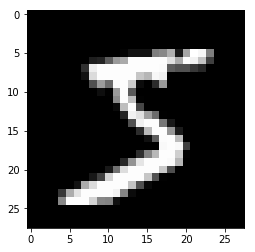

In [11]:
plt.imshow(X_train[0], cmap='gray')

In [12]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [15]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [16]:
from keras.utils.np_utils import to_categorical

In [17]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [18]:
y_train[0]

5

In [19]:
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [20]:
y_train_cat.shape

(60000, 10)

In [21]:
y_test_cat.shape

(10000, 10)

### Fully connected on images

In [22]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [23]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s - loss: 0.3173 - acc: 0.9020 - val_loss: 0.1802 - val_acc: 0.9467
Epoch 2/10
42000/42000 [==============================] - 3s - loss: 0.1104 - acc: 0.9662 - val_loss: 0.2708 - val_acc: 0.9246
Epoch 3/10
42000/42000 [==============================] - 3s - loss: 0.0717 - acc: 0.9780 - val_loss: 0.1402 - val_acc: 0.9612
Epoch 4/10
42000/42000 [==============================] - 4s - loss: 0.0501 - acc: 0.9846 - val_loss: 0.2042 - val_acc: 0.9462
Epoch 5/10
42000/42000 [==============================] - 3s - loss: 0.0398 - acc: 0.9872 - val_loss: 0.1260 - val_acc: 0.9704
Epoch 6/10
42000/42000 [==============================] - 4s - loss: 0.0307 - acc: 0.9904 - val_loss: 0.1174 - val_acc: 0.9741
Epoch 7/10
42000/42000 [==============================] - 5s - loss: 0.0244 - acc: 0.9932 - val_loss: 0.1492 - val_acc: 0.9688
Epoch 8/10
42000/42000 [==============================] - 4s 

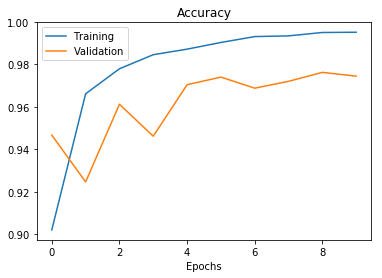

In [24]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [25]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

 9568/10000 [===========================>..] - ETA: 0s

0.97860000000000003

### Tensor Math

In [26]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [27]:
A

array([[[[0, 7, 6, 8, 4],
         [7, 0, 0, 1, 7],
         [4, 8, 5, 1, 6],
         [4, 8, 0, 0, 9]],

        [[7, 7, 1, 5, 4],
         [1, 2, 9, 2, 8],
         [1, 0, 4, 0, 0],
         [7, 6, 6, 9, 1]],

        [[4, 3, 0, 9, 3],
         [5, 4, 6, 4, 7],
         [2, 1, 6, 1, 6],
         [1, 9, 0, 8, 6]]],


       [[[0, 1, 6, 1, 0],
         [5, 2, 3, 8, 6],
         [6, 7, 2, 0, 0],
         [6, 4, 3, 0, 8]],

        [[4, 3, 4, 8, 2],
         [0, 5, 6, 9, 8],
         [1, 8, 2, 7, 3],
         [9, 0, 1, 6, 2]],

        [[1, 9, 7, 8, 4],
         [7, 9, 7, 6, 1],
         [8, 6, 7, 4, 4],
         [9, 3, 9, 5, 5]]]])

In [28]:
A[0, 1, 0, 3]

5

In [29]:
B

array([[8, 2, 2],
       [7, 2, 6]])

#### A random colored image

In [30]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[245,  50, 222],
        [  6,  34,  45],
        [157,   2, 204],
        [ 99, 185, 148]],

       [[107,   6, 101],
        [197, 222,  62],
        [136, 203, 122],
        [139, 137, 166]],

       [[190, 154, 241],
        [ 85, 158,  98],
        [254, 203, 157],
        [140, 220,  48]],

       [[232,  43, 171],
        [ 92,   3, 159],
        [ 50, 120, 221],
        [ 49,  11, 253]]], dtype=uint8)

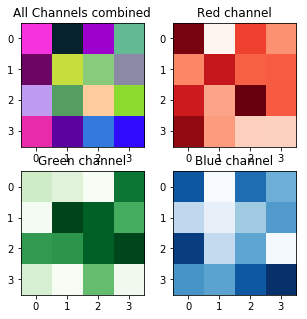

In [31]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

### Tensor operations

In [32]:
2 * A

array([[[[ 0, 14, 12, 16,  8],
         [14,  0,  0,  2, 14],
         [ 8, 16, 10,  2, 12],
         [ 8, 16,  0,  0, 18]],

        [[14, 14,  2, 10,  8],
         [ 2,  4, 18,  4, 16],
         [ 2,  0,  8,  0,  0],
         [14, 12, 12, 18,  2]],

        [[ 8,  6,  0, 18,  6],
         [10,  8, 12,  8, 14],
         [ 4,  2, 12,  2, 12],
         [ 2, 18,  0, 16, 12]]],


       [[[ 0,  2, 12,  2,  0],
         [10,  4,  6, 16, 12],
         [12, 14,  4,  0,  0],
         [12,  8,  6,  0, 16]],

        [[ 8,  6,  8, 16,  4],
         [ 0, 10, 12, 18, 16],
         [ 2, 16,  4, 14,  6],
         [18,  0,  2, 12,  4]],

        [[ 2, 18, 14, 16,  8],
         [14, 18, 14, 12,  2],
         [16, 12, 14,  8,  8],
         [18,  6, 18, 10, 10]]]])

In [33]:
A + A

array([[[[ 0, 14, 12, 16,  8],
         [14,  0,  0,  2, 14],
         [ 8, 16, 10,  2, 12],
         [ 8, 16,  0,  0, 18]],

        [[14, 14,  2, 10,  8],
         [ 2,  4, 18,  4, 16],
         [ 2,  0,  8,  0,  0],
         [14, 12, 12, 18,  2]],

        [[ 8,  6,  0, 18,  6],
         [10,  8, 12,  8, 14],
         [ 4,  2, 12,  2, 12],
         [ 2, 18,  0, 16, 12]]],


       [[[ 0,  2, 12,  2,  0],
         [10,  4,  6, 16, 12],
         [12, 14,  4,  0,  0],
         [12,  8,  6,  0, 16]],

        [[ 8,  6,  8, 16,  4],
         [ 0, 10, 12, 18, 16],
         [ 2, 16,  4, 14,  6],
         [18,  0,  2, 12,  4]],

        [[ 2, 18, 14, 16,  8],
         [14, 18, 14, 12,  2],
         [16, 12, 14,  8,  8],
         [18,  6, 18, 10, 10]]]])

In [34]:
A.shape

(2, 3, 4, 5)

In [35]:
B.shape

(2, 3)

In [36]:
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[ 36, 143, 142, 163,  74],
       [145,  90, 105, 130, 150],
       [130, 167, 120,  48,  90],
       [162, 140,  89,  76, 176]])

In [37]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

### 1D convolution

In [38]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [39]:
b = np.array([-1, 1], dtype='float32')

In [40]:
c = np.convolve(a, b)

In [41]:
a

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.], dtype=float32)

In [42]:
b

array([-1.,  1.], dtype=float32)

In [43]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

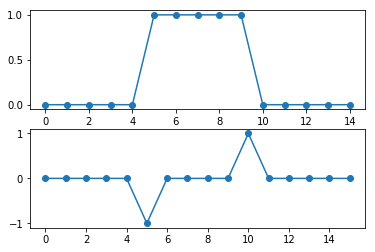

In [44]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(c, 'o-')

### Image filters with convolutions

In [45]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [46]:
img = misc.ascent()

In [47]:
img.shape

(512, 512)

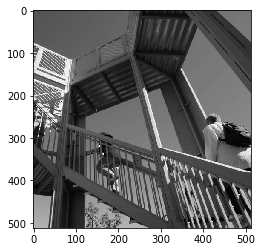

In [48]:
plt.imshow(img, cmap='gray')

In [49]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])


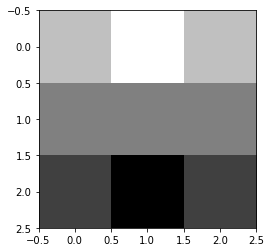

In [50]:
plt.imshow(h_kernel, cmap='gray')

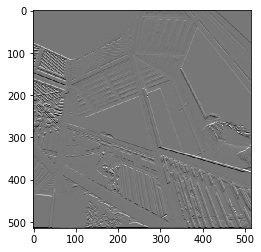

In [51]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray')

## Convolutional neural networks

In [52]:
from keras.layers import Conv2D

In [53]:
img.shape

(512, 512)

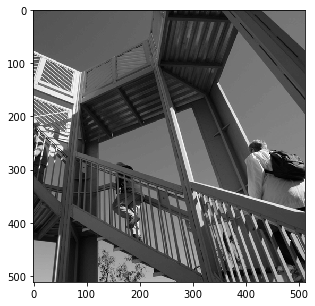

In [54]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [55]:
img_tensor = img.reshape((1, 512, 512, 1))

In [56]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [57]:
img_pred_tensor = model.predict(img_tensor)

In [58]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [59]:
img_pred = img_pred_tensor[0, :, :, 0]

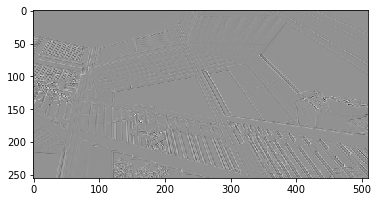

In [60]:
plt.imshow(img_pred, cmap='gray')

In [61]:
weights = model.get_weights()

In [62]:
weights[0].shape

(3, 3, 1, 1)

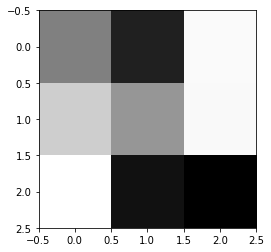

In [63]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [64]:
weights[0] = np.ones(weights[0].shape)

In [65]:
model.set_weights(weights)

In [66]:
img_pred_tensor = model.predict(img_tensor)

In [67]:
img_pred = img_pred_tensor[0, :, :, 0]

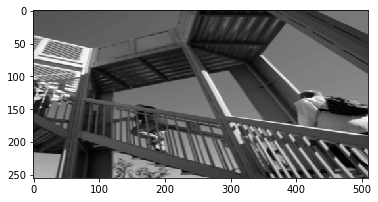

In [68]:
plt.imshow(img_pred, cmap='gray')

In [69]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape

(1, 512, 512, 1)

## Pooling layers

In [70]:
from keras.layers import MaxPool2D, AvgPool2D

In [71]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [72]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

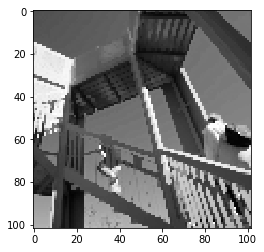

In [73]:
plt.imshow(img_pred, cmap='gray')

In [74]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

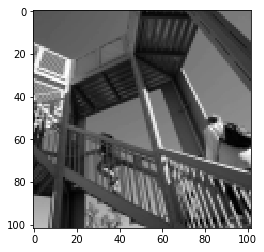

In [75]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

## Final architecture

In [76]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [77]:
X_train.shape

(60000, 28, 28, 1)

In [78]:
from keras.layers import Flatten, Activation

In [79]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 16s - loss: 0.2830 - acc: 0.9145 - val_loss: 0.1386 - val_acc: 0.9571
Epoch 2/2
42000/42000 [==============================] - 17s - loss: 0.0875 - acc: 0.9738 - val_loss: 0.0811 - val_acc: 0.9766


In [82]:
model.evaluate(X_test, y_test_cat)

 9664/10000 [===========================>..] - ETA: 0s

[0.067692408797889944, 0.97850000000000004]

### Exercise 1
You've been hired by a shipping company to overhaul the way they route mail, parcels and packages. They want to build an image recognition system  capable of recognizing the digits in the zipcode on a package, so that it can be automatically routed to the correct location.
You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the intial training of your model!

Build a deep convolutional neural network with at least two convolutional and two pooling layers before the fully connected layer.

- Start from the network we have just built
- Insert a `Conv2D` layer after the first `MaxPool2D`, give it 64 filters.
- Insert a `MaxPool2D` after that one
- Insert an `Activation` layer
- retrain the model
- does performance improve?
- how many parameters does this new model have? More or less than the previous model? Why?
- how long did this second model take to train? Longer or shorter than the previous model? Why?
- did it perform better or worse than the previous model?

In [83]:
from keras.datasets import mnist

In [84]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(('/tmp/mnist.npz'))

In [85]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [86]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [87]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [90]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [92]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 23s - loss: 0.2521 - acc: 0.9223 - val_loss: 0.0760 - val_acc: 0.9770
Epoch 2/2
42000/42000 [==============================] - 23s - loss: 0.0662 - acc: 0.9800 - val_loss: 0.0661 - val_acc: 0.9791


In [93]:
model.evaluate(X_test, y_test_cat)

 9888/10000 [============================>.] - ETA: 0s

[0.046505157037777828, 0.9849]

### Exercise 2

Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard that is shipped to destination. Your boss would like to know what images people are loading on the site in order to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the [Cifar 10 Dataset](http://www.cs.toronto.edu/~kriz/cifar.html), a very famous dataset that contains images for 10 different categories:

- airplane 										
- automobile 										
- bird 										
- cat 										
- deer 										
- dog 										
- frog 										
- horse 										
- ship 										
- truck

In this exercise we will reach the limit of what you can achieve on your laptop and get ready for the next session on cloud GPUs.

Here's what you have to do:
- load the cifar10 dataset using `keras.datasets.cifar10.load_data()`
- display a few images, see how hard/easy it is for you to recognize an object with such low resolution
- check the shape of X_train, does it need reshape?
- check the scale of X_train, does it need rescaling?
- check the shape of y_train, does it need reshape?
- build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
    - conv2d
    - conv2d
    - maxpool
    - conv2d
    - conv2d
    - maxpool
    - flatten
    - dense
    - output
- compile the model and check the number of parameters
- attempt to train the model with the optimizer of your choice. How fast does training proceed?
- If training is too slow (as expected) stop the execution and move to the next session!

In [94]:
from keras.datasets import cifar10

In [96]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [98]:
X_train.shape

(50000, 32, 32, 3)

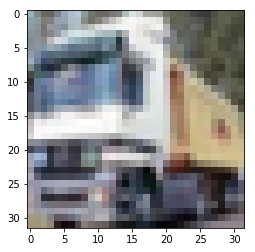

In [97]:
plt.imshow(X_train[1])

In [99]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [100]:
y_train.shape

(50000, 1)

In [101]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [102]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))Jupyter Notebook
6 Convolutional Neural Networks
Last Checkpoint: 19 minutes ago
(autosaved)
Current Kernel Logo
Python 3 
File
Edit
View
Insert
Cell
Kernel
Widgets
Help

Convolutional Neural Networks
Machine learning on images

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
MNIST

from keras.datasets import mnist
Using TensorFlow backend.

(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')
Downloading data from https://s3.amazonaws.com/img-datasets/mnist.npz

X_train.shape
(60000, 28, 28)

X_test.shape
(10000, 28, 28)

X_train[0]
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

plt.imshow(X_train[0], cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e3f5d2d68>


X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train.shape
(60000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

X_train[0]
array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01176471,  0.07058824,  0.07058824,
        0.07058824,  0.49411765,  0.53333336,  0.68627453,  0.10196079,
        0.65098041,  1.        ,  0.96862745,  0.49803922,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.11764706,  0.14117648,  0.36862746,  0.60392159,
        0.66666669,  0.99215686,  0.99215686,  0.99215686,  0.99215686,
        0.99215686,  0.88235295,  0.67450982,  0.99215686,  0.94901961,
        0.7647059 ,  0.25098041,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.19215687,  0.93333334,
        0.99215686,  0.99215686,  0.99215686,  0.99215686,  0.99215686,
        0.99215686,  0.99215686,  0.99215686,  0.98431373,  0.36470589,
        0.32156864,  0.32156864,  0.21960784,  0.15294118,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.07058824,  0.85882354,  0.99215686,  0.99215686,
        0.99215686,  0.99215686,  0.99215686,  0.7764706 ,  0.71372551,
        0.96862745,  0.94509804,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.3137255 ,  0.61176473,  0.41960785,  0.99215686,  0.99215686,
        0.80392158,  0.04313726,  0.        ,  0.16862746,  0.60392159,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.05490196,
        0.00392157,  0.60392159,  0.99215686,  0.35294119,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.54509807,
        0.99215686,  0.74509805,  0.00784314,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.04313726,  0.74509805,  0.99215686,
        0.27450982,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.13725491,  0.94509804,  0.88235295,  0.627451  ,
        0.42352942,  0.00392157,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.31764707,  0.94117647,  0.99215686,  0.99215686,  0.46666667,
        0.09803922,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.17647059,
        0.72941178,  0.99215686,  0.99215686,  0.58823532,  0.10588235,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0627451 ,  0.36470589,
        0.98823529,  0.99215686,  0.73333335,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.97647059,  0.99215686,
        0.97647059,  0.25098041,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.18039216,  0.50980395,
        0.71764708,  0.99215686,  0.99215686,  0.81176472,  0.00784314,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.15294118,
        0.58039218,  0.89803922,  0.99215686,  0.99215686,  0.99215686,
        0.98039216,  0.71372551,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.09411765,  0.44705883,  0.86666667,  0.99215686,  0.99215686,
        0.99215686,  0.99215686,  0.78823531,  0.30588236,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.09019608,  0.25882354,  0.83529413,  0.99215686,
        0.99215686,  0.99215686,  0.99215686,  0.7764706 ,  0.31764707,
        0.00784314,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.07058824,  0.67058825,  0.85882354,
        0.99215686,  0.99215686,  0.99215686,  0.99215686,  0.7647059 ,
        0.3137255 ,  0.03529412,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.21568628,  0.67450982,
        0.88627452,  0.99215686,  0.99215686,  0.99215686,  0.99215686,
        0.95686275,  0.52156866,  0.04313726,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.53333336,  0.99215686,  0.99215686,  0.99215686,
        0.83137256,  0.52941179,  0.51764709,  0.0627451 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train[0]
5

y_train_cat[0]
array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

y_train_cat.shape
(60000, 10)

y_test_cat.shape
(10000, 10)
Fully connected on images

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
​
K.clear_session()
​
model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
​

h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s - loss: 0.3173 - acc: 0.9020 - val_loss: 0.1802 - val_acc: 0.9467
Epoch 2/10
42000/42000 [==============================] - 3s - loss: 0.1104 - acc: 0.9662 - val_loss: 0.2708 - val_acc: 0.9246
Epoch 3/10
42000/42000 [==============================] - 3s - loss: 0.0717 - acc: 0.9780 - val_loss: 0.1402 - val_acc: 0.9612
Epoch 4/10
42000/42000 [==============================] - 4s - loss: 0.0501 - acc: 0.9846 - val_loss: 0.2042 - val_acc: 0.9462
Epoch 5/10
42000/42000 [==============================] - 3s - loss: 0.0398 - acc: 0.9872 - val_loss: 0.1260 - val_acc: 0.9704
Epoch 6/10
42000/42000 [==============================] - 4s - loss: 0.0307 - acc: 0.9904 - val_loss: 0.1174 - val_acc: 0.9741
Epoch 7/10
42000/42000 [==============================] - 5s - loss: 0.0244 - acc: 0.9932 - val_loss: 0.1492 - val_acc: 0.9688
Epoch 8/10
42000/42000 [==============================] - 4s - loss: 0.0207 - acc: 0.9935 - val_loss: 0.1331 - val_acc: 0.9721
Epoch 9/10
42000/42000 [==============================] - 4s - loss: 0.0164 - acc: 0.9951 - val_loss: 0.1297 - val_acc: 0.9763
Epoch 10/10
42000/42000 [==============================] - 4s - loss: 0.0157 - acc: 0.9952 - val_loss: 0.1549 - val_acc: 0.9745


plt.title('Accuracy')
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
<matplotlib.text.Text at 0x7f5e423e6e48>


test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy
 9568/10000 [===========================>..] - ETA: 0s
0.97860000000000003
Tensor Math

A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

A
array([[[[0, 7, 6, 8, 4],
         [7, 0, 0, 1, 7],
         [4, 8, 5, 1, 6],
         [4, 8, 0, 0, 9]],

        [[7, 7, 1, 5, 4],
         [1, 2, 9, 2, 8],
         [1, 0, 4, 0, 0],
         [7, 6, 6, 9, 1]],

        [[4, 3, 0, 9, 3],
         [5, 4, 6, 4, 7],
         [2, 1, 6, 1, 6],
         [1, 9, 0, 8, 6]]],


       [[[0, 1, 6, 1, 0],
         [5, 2, 3, 8, 6],
         [6, 7, 2, 0, 0],
         [6, 4, 3, 0, 8]],

        [[4, 3, 4, 8, 2],
         [0, 5, 6, 9, 8],
         [1, 8, 2, 7, 3],
         [9, 0, 1, 6, 2]],

        [[1, 9, 7, 8, 4],
         [7, 9, 7, 6, 1],
         [8, 6, 7, 4, 4],
         [9, 3, 9, 5, 5]]]])

A[0, 1, 0, 3]
5

B
array([[8, 2, 2],
       [7, 2, 6]])
A random colored image

img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img
array([[[245,  50, 222],
        [  6,  34,  45],
        [157,   2, 204],
        [ 99, 185, 148]],

       [[107,   6, 101],
        [197, 222,  62],
        [136, 203, 122],
        [139, 137, 166]],

       [[190, 154, 241],
        [ 85, 158,  98],
        [254, 203, 157],
        [140, 220,  48]],

       [[232,  43, 171],
        [ 92,   3, 159],
        [ 50, 120, 221],
        [ 49,  11, 253]]], dtype=uint8)

plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")
​
plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")
​
plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")
​
plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")
<matplotlib.text.Text at 0x7f5e54cded68>

Tensor operations

2 * A
array([[[[ 0, 14, 12, 16,  8],
         [14,  0,  0,  2, 14],
         [ 8, 16, 10,  2, 12],
         [ 8, 16,  0,  0, 18]],

        [[14, 14,  2, 10,  8],
         [ 2,  4, 18,  4, 16],
         [ 2,  0,  8,  0,  0],
         [14, 12, 12, 18,  2]],

        [[ 8,  6,  0, 18,  6],
         [10,  8, 12,  8, 14],
         [ 4,  2, 12,  2, 12],
         [ 2, 18,  0, 16, 12]]],


       [[[ 0,  2, 12,  2,  0],
         [10,  4,  6, 16, 12],
         [12, 14,  4,  0,  0],
         [12,  8,  6,  0, 16]],

        [[ 8,  6,  8, 16,  4],
         [ 0, 10, 12, 18, 16],
         [ 2, 16,  4, 14,  6],
         [18,  0,  2, 12,  4]],

        [[ 2, 18, 14, 16,  8],
         [14, 18, 14, 12,  2],
         [16, 12, 14,  8,  8],
         [18,  6, 18, 10, 10]]]])

A + A
array([[[[ 0, 14, 12, 16,  8],
         [14,  0,  0,  2, 14],
         [ 8, 16, 10,  2, 12],
         [ 8, 16,  0,  0, 18]],

        [[14, 14,  2, 10,  8],
         [ 2,  4, 18,  4, 16],
         [ 2,  0,  8,  0,  0],
         [14, 12, 12, 18,  2]],

        [[ 8,  6,  0, 18,  6],
         [10,  8, 12,  8, 14],
         [ 4,  2, 12,  2, 12],
         [ 2, 18,  0, 16, 12]]],


       [[[ 0,  2, 12,  2,  0],
         [10,  4,  6, 16, 12],
         [12, 14,  4,  0,  0],
         [12,  8,  6,  0, 16]],

        [[ 8,  6,  8, 16,  4],
         [ 0, 10, 12, 18, 16],
         [ 2, 16,  4, 14,  6],
         [18,  0,  2, 12,  4]],

        [[ 2, 18, 14, 16,  8],
         [14, 18, 14, 12,  2],
         [16, 12, 14,  8,  8],
         [18,  6, 18, 10, 10]]]])

A.shape
(2, 3, 4, 5)

B.shape
(2, 3)

np.tensordot(A, B, axes=([0, 1], [0, 1]))
array([[ 36, 143, 142, 163,  74],
       [145,  90, 105, 130, 150],
       [130, 167, 120,  48,  90],
       [162, 140,  89,  76, 176]])

np.tensordot(A, B, axes=([0], [0])).shape
(3, 4, 5, 3)
1D convolution

a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

b = np.array([-1, 1], dtype='float32')

c = np.convolve(a, b)

a
array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.], dtype=float32)

b
array([-1.,  1.], dtype=float32)

c
array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

plt.subplot(211)
plt.plot(a, 'o-')
​
plt.subplot(212)
plt.plot(c, 'o-')
[<matplotlib.lines.Line2D at 0x7f5e54c3c208>]

Image filters with convolutions

from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

img = misc.ascent()

img.shape
(512, 512)

plt.imshow(img, cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e422a9b38>


h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])
​

plt.imshow(h_kernel, cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e41ff2710>


res = convolve2d(img, h_kernel)
​
plt.imshow(res, cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e41f56550>

Convolutional neural networks

from keras.layers import Conv2D

img.shape
(512, 512)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e3030a048>


img_tensor = img.reshape((1, 512, 512, 1))

model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape
(1, 255, 510, 1)

img_pred = img_pred_tensor[0, :, :, 0]

plt.imshow(img_pred, cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e302a2588>


weights = model.get_weights()

weights[0].shape
(3, 3, 1, 1)

plt.imshow(weights[0][:, :, 0, 0], cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e3023cf98>


weights[0] = np.ones(weights[0].shape)

model.set_weights(weights)

img_pred_tensor = model.predict(img_tensor)

img_pred = img_pred_tensor[0, :, :, 0]

plt.imshow(img_pred, cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e301abf60>


model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')
​
img_pred_tensor = model.predict(img_tensor)
​
​
img_pred_tensor.shape
(1, 512, 512, 1)
Pooling layers

from keras.layers import MaxPool2D, AvgPool2D

model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

img_pred = model.predict(img_tensor)[0, :, :, 0]

plt.imshow(img_pred, cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e300a0f60>


model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')
<matplotlib.image.AxesImage at 0x7f5e287c9da0>

Final architecture

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train.shape
(60000, 28, 28, 1)

from keras.layers import Flatten, Activation

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
K.clear_session()
​
model = Sequential()
​
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))
​
model.add(Flatten())
​
model.add(Dense(128, activation='relu'))
​
model.add(Dense(10, activation='softmax'))
​
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
=================================================================
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________

model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)
Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 16s - loss: 0.2830 - acc: 0.9145 - val_loss: 0.1386 - val_acc: 0.9571
Epoch 2/2
42000/42000 [==============================] - 17s - loss: 0.0875 - acc: 0.9738 - val_loss: 0.0811 - val_acc: 0.9766
<keras.callbacks.History at 0x7f5e097edcc0>

model.evaluate(X_test, y_test_cat)
model.evaluate(X_test, y_test_cat)
 9664/10000 [===========================>..] - ETA: 0s
[0.067692408797889944, 0.97850000000000004]
Exercise 1
You've been hired by a shipping company to overhaul the way they route mail, parcels and packages. They want to build an image recognition system capable of recognizing the digits in the zipcode on a package, so that it can be automatically routed to the correct location. You are tasked to build the digit recognition system. Luckily, you can rely on the MNIST dataset for the intial training of your model!

Build a deep convolutional neural network with at least two convolutional and two pooling layers before the fully connected layer.

Start from the network we have just built
Insert a Conv2D layer after the first MaxPool2D, give it 64 filters.
Insert a MaxPool2D after that one
Insert an Activation layer
retrain the model
does performance improve?
how many parameters does this new model have? More or less than the previous model? Why?
how long did this second model take to train? Longer or shorter than the previous model? Why?
did it perform better or worse than the previous model?

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data(('/tmp/mnist.npz'))
(X_train, y_train), (X_test, y_test) = mnist.load_data(('/tmp/mnist.npz'))

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

est
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

est
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
K.clear_session()
​
model = Sequential()
​
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))
​
model.add(Conv2D(64, (3, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))
​
model.add(Flatten())
​
model.add(Dense(128, activation='relu'))
​
model.add(Dense(10, activation='softmax'))
​
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
=================================================================
Total params: 225,034
Trainable params: 225,034
Non-trainable params: 0
_________________________________________________________________

model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)
Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 23s - loss: 0.2521 - acc: 0.9223 - val_loss: 0.0760 - val_acc: 0.9770
Epoch 2/2
42000/42000 [==============================] - 23s - loss: 0.0662 - acc: 0.9800 - val_loss: 0.0661 - val_acc: 0.9791
<keras.callbacks.History at 0x7f5e33f9b9e8>

model.evaluate(X_test, y_test_cat)
 9888/10000 [============================>.] - ETA: 0s
[0.046505157037777828, 0.9849]
Exercise 2
Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard that is shipped to destination. Your boss would like to know what images people are loading on the site in order to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the Cifar 10 Dataset, a very famous dataset that contains images for 10 different categories:

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
In this exercise we will reach the limit of what you can achieve on your laptop and get ready for the next session on cloud GPUs.

Here's what you have to do:

load the cifar10 dataset using keras.datasets.cifar10.load_data()
display a few images, see how hard/easy it is for you to recognize an object with such low resolution
check the shape of X_train, does it need reshape?
check the scale of X_train, does it need rescaling?
check the shape of y_train, does it need reshape?
build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
conv2d
conv2d
maxpool
conv2d
conv2d
maxpool
flatten
dense
output
compile the model and check the number of parameters
attempt to train the model with the optimizer of your choice. How fast does training proceed?
If training is too slow (as expected) stop the execution and move to the next session!

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Downloading data from http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

X_train.shape
(50000, 32, 32, 3)

plt.imshow(X_train[1])
<matplotlib.image.AxesImage at 0x7f5e329ea1d0>


X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train.shape
y_train.shape
(50000, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

K.clear_session()
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

floyd run --gpu model.fit(X_train, y_train_cat, batch_size=32,
          epochs=2, verbose=1, validation__data(X_test,y_test),shuffle=True)
  File "<ipython-input-106-d15b98909598>", line 1
    floyd run --gpu model.fit(X_train, y_train_cat, batch_size=32,
            ^
SyntaxError: invalid syntax



​

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [106]:
floyd run --gpu model.fit(X_train, y_train_cat, batch_size=32,
          epochs=2, verbose=1, validation__data(X_test,y_test),shuffle=True)

SyntaxError: invalid syntax (<ipython-input-106-d15b98909598>, line 1)